In [1]:
import numpy as np, matplotlib.pyplot as plt
import matplotlib as mpl
import corner
import seaborn.apionly as sns
import pandas as pd
%matplotlib inline

/Users/bcook/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
df = pd.read_csv('results/test_chain_smallgpu.csv')
df_accept = pd.read_csv('results/test_accept_smallgpu.csv')
df.head()

,logz,logdust,logSFH0,logSFH1,logSFH2,logSFH3,logSFH4,logSFH5,logSFH6,lnprob,N_walkers
0,-1.0395,-3.6949,-1.1163,-4.5191,-4.0060,-4.5138,-0.3485,-0.8777,-1.2923,-1.413422e+06,20
1,-1.2395,-4.1748,-1.7351,-5.6354,-4.8170,-4.6770,-1.0988,-1.6748,-1.2067,-1.082963e+06,20
2,-1.4412,-4.6590,-4.0852,-5.9779,-3.6072,-5.0725,-0.9178,-2.1383,-3.3762,-1.053590e+06,20
3,-1.4412,-4.6590,-4.0852,-5.9779,-3.6072,-5.0725,-0.9178,-2.1383,-3.3762,-1.053590e+06,20
4,-1.8422,-5.6214,-5.6748,-9.3922,-5.5418,-5.7101,-1.6970,-2.0048,-4.1013,-1.045540e+06,20


In [7]:
params = df.columns[:-2]

In [17]:
N_walkers = df['N_walkers'][0]
N_steps = len(df) / N_walkers
N_params = len(params) 

In [36]:
flatchains = df[params].values
chains = flatchains.reshape((N_walkers, N_steps, N_params))

In [37]:
walkers = np.arange(N_walkers)
steps = np.arange(N_steps)

In [38]:
SFH = np.log10(1e2 / 7.)
truths = np.array([-0.2, -2., SFH, SFH, SFH, SFH, SFH, SFH, SFH])

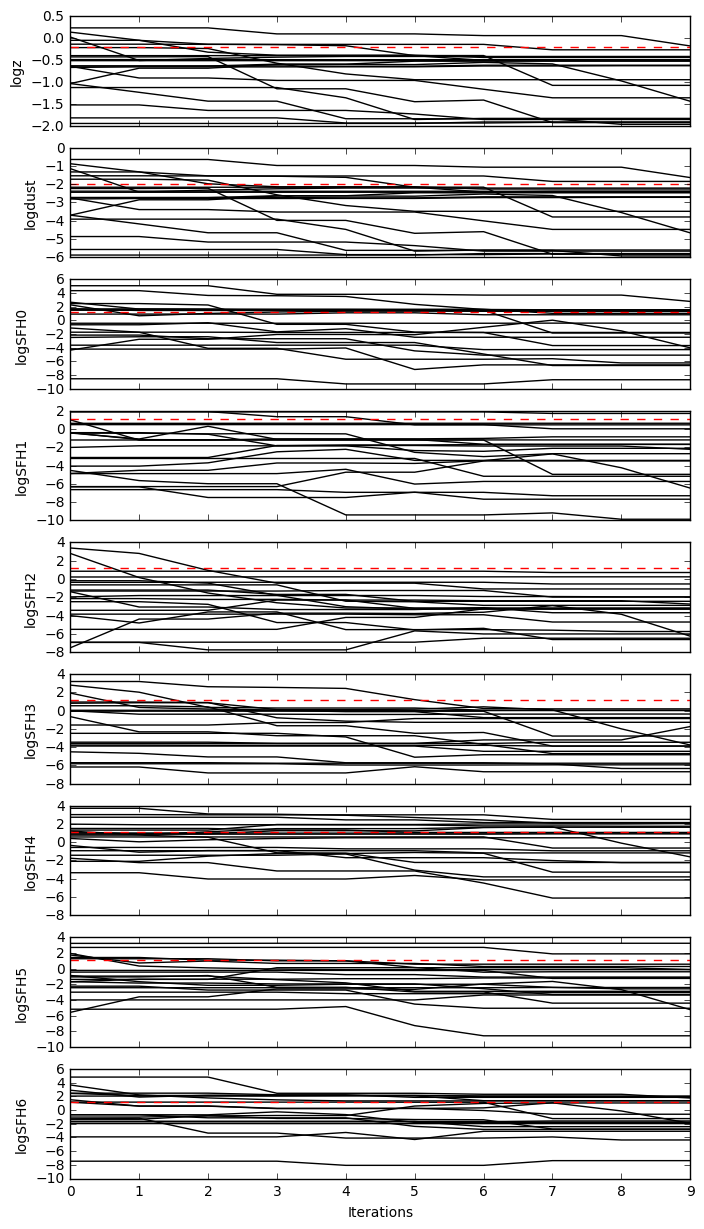

In [41]:
fig, axes = plt.subplots(nrows=N_params, figsize=(8, 15), sharex=True)
for d in np.arange(N_params):    
    for w in walkers:
        axes[d].plot(steps, chains[w,:,d], 'k-')
    axes[d].axhline(y=truths[d], ls='--', color='r')
    axes[d].set_ylabel(params[d])
axes[-1].set_xlabel('Iterations')

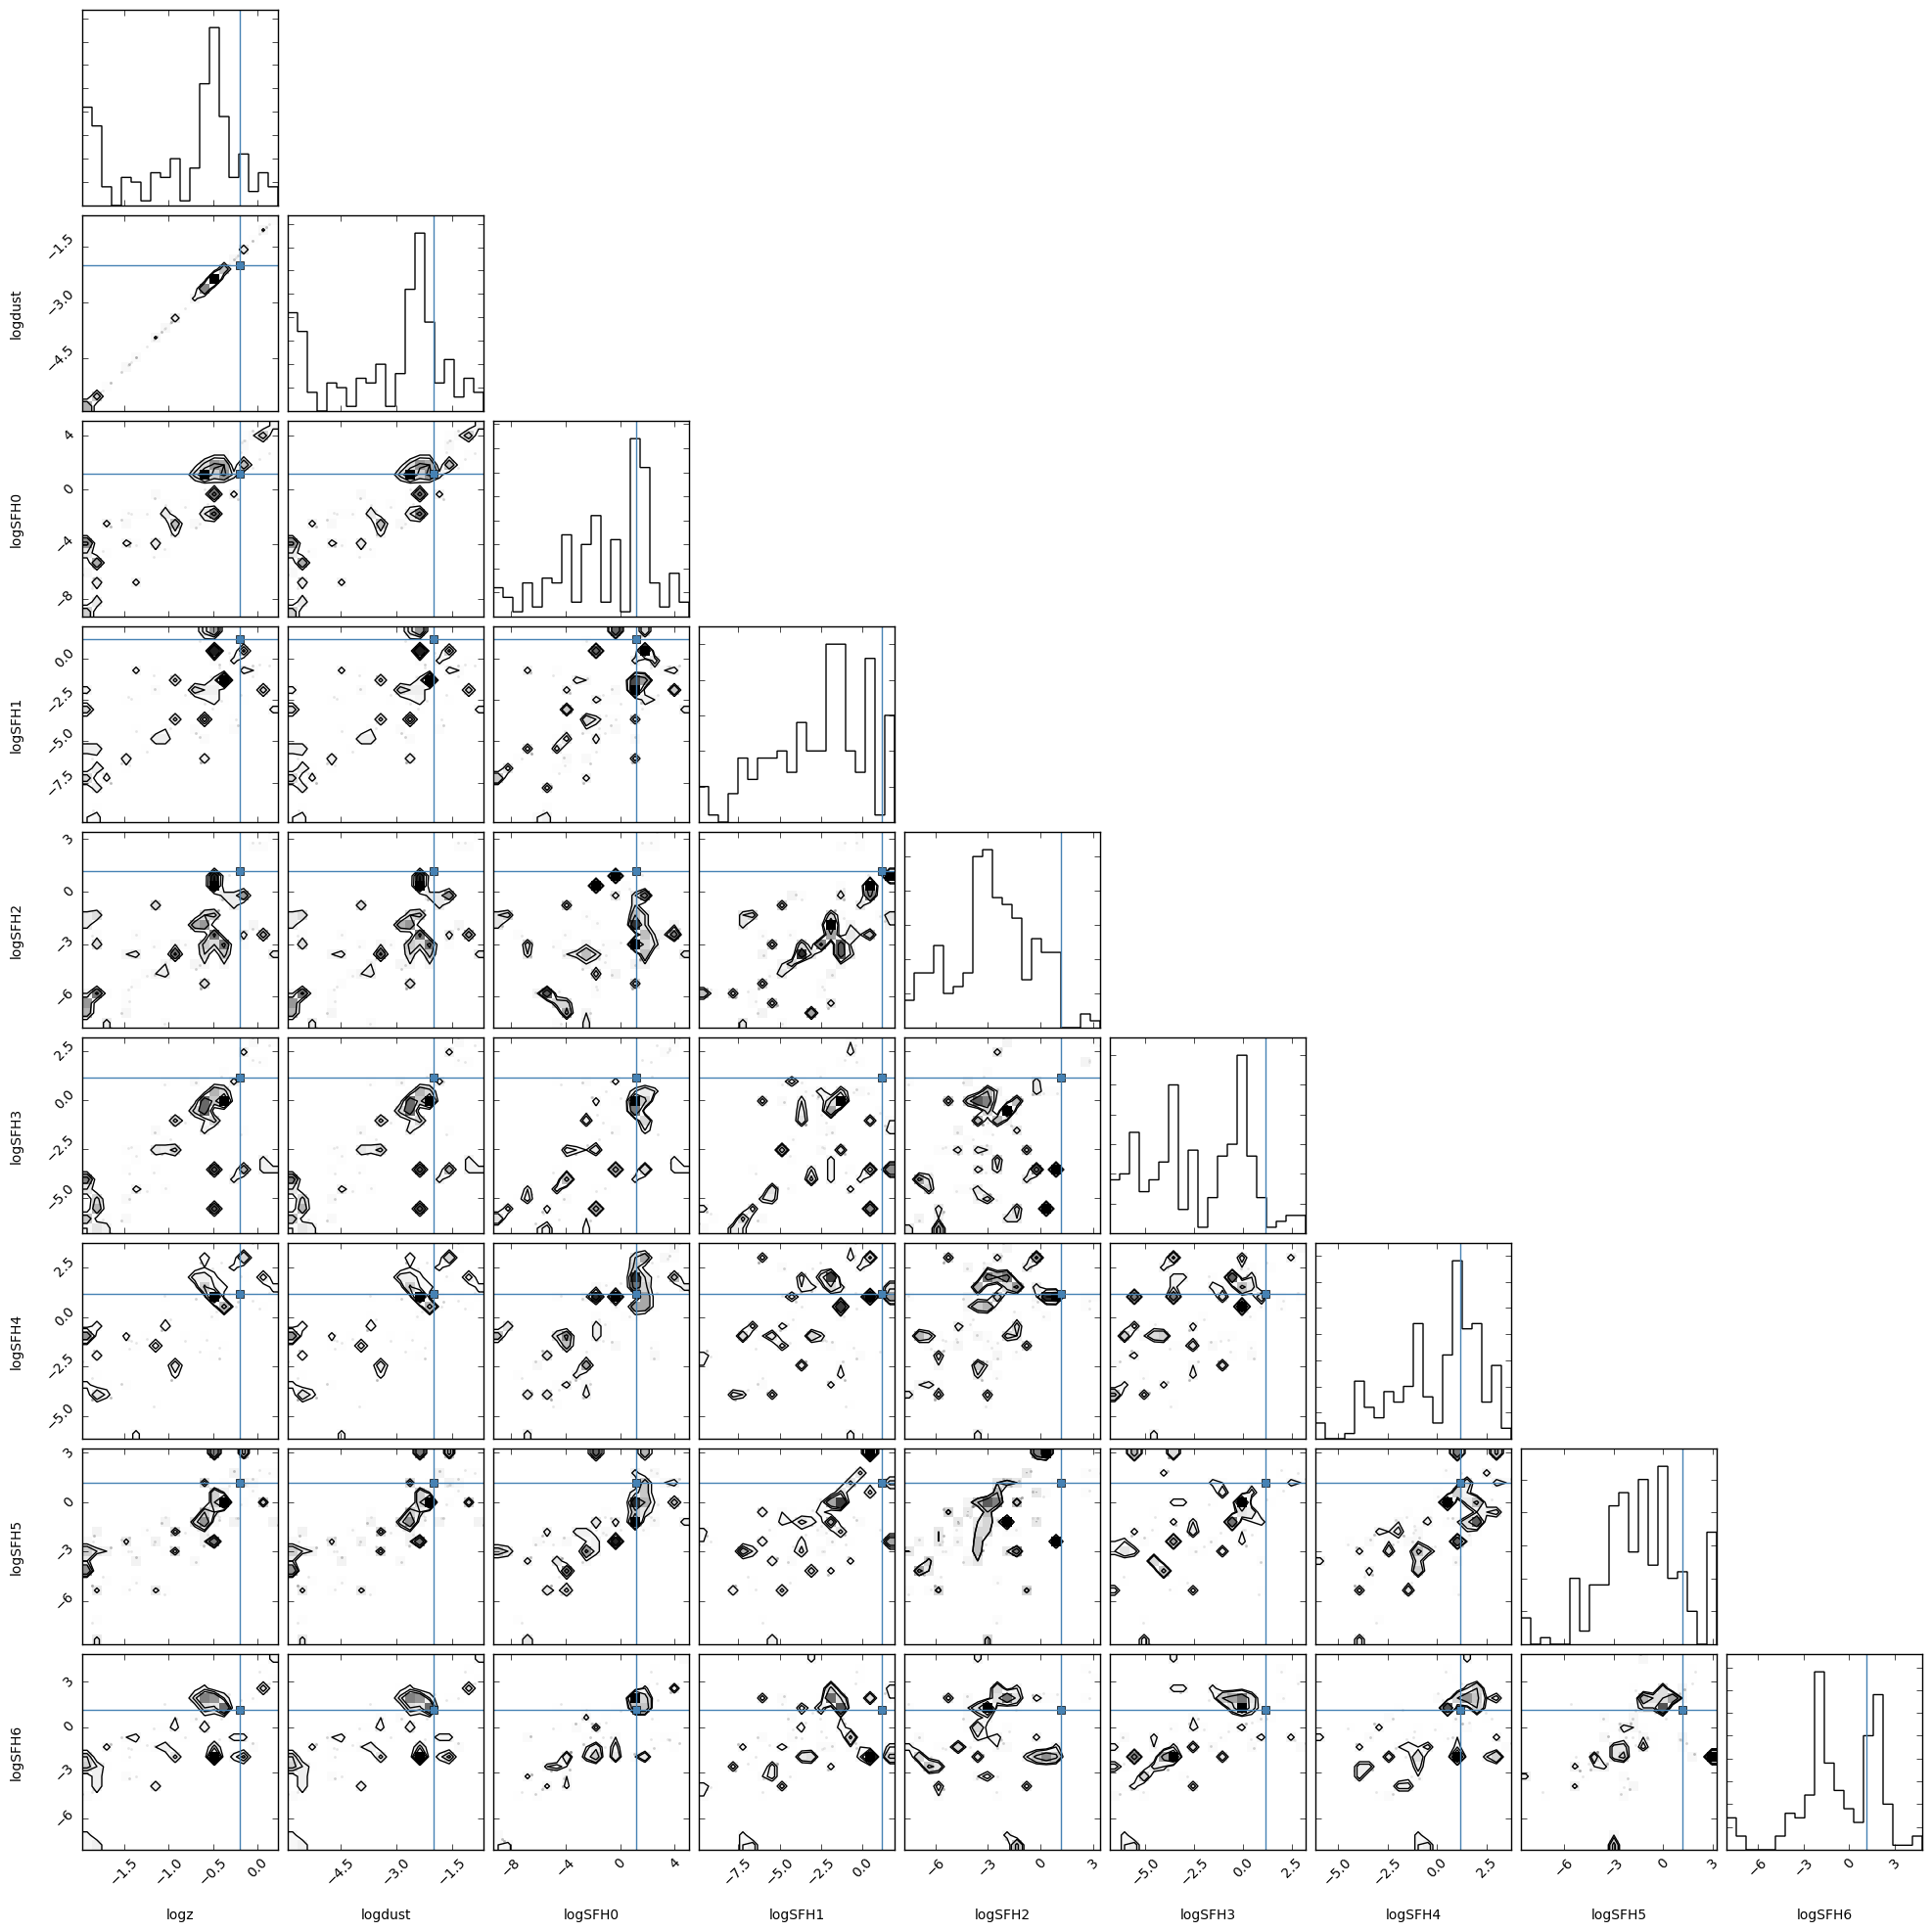

In [40]:
a = corner.corner(df[params], labels=params, truths=truths)